In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#Random initial values. Time independent

In [2]:
n_gen = 12
n_root = 2**n_gen
n_iterations = 10000
final_values = empty((0))
for i in range(n_iterations):
    init_values = random.random(n_root)
    old_values = init_values.copy()
    for gen in range(n_gen):
        new_values = zeros(n_root/(2**(gen+1)))
        even = arange(n_root/(2**(gen+1))) * 2
        new_values = old_values[even] + old_values[even+1]
        old_values = new_values.copy()
    final_values = append(final_values, new_values[0])

18.4189659438
18.5448999212


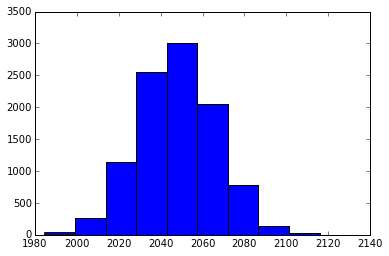

In [3]:
print final_values.std() # measured value
print sqrt(n_root*init_values.std()**2) # expected value
a = hist(final_values)

#Random initial values. Time evolution. Constant rates

In [4]:
def my_function(x,time, alpha=1.0):
    y = x*exp(-time*alpha)
    return y

n_gen = 8
n_root = 2**n_gen
n_iterations = 10000
final_values = empty((0))
for i in range(n_iterations):
    init_values = random.random(n_root)
    old_values = init_values.copy()
    alpha = 1.0
    time = 1.0
    for gen in range(n_gen):
        new_values = zeros(n_root/(2**(gen+1)))
        even = arange(n_root/(2**(gen+1))) * 2
        new_values = my_function(old_values[even],time, alpha) + my_function(old_values[even+1],time, alpha)
        old_values = new_values.copy()
    final_values = append(final_values, new_values[0])

27.9524191254
27.4982772995


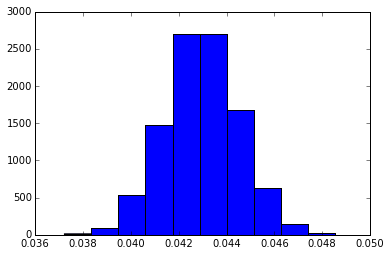

In [5]:
print final_values.mean()/final_values.std() # measured value Signal/Noise
print 0.5*n_root/sqrt(n_root*init_values.std()**2) # expected value Signal/Noise
a = hist(final_values)

#Random initial values. Time evolution. Random rates

In [6]:
def my_function(x,time, alpha=1.0):
    y = x*exp(-time*alpha)
    return y

n_gen = 8
n_root = 2**n_gen
n_iterations = 10000
final_values = empty((0))
for i in range(n_iterations):
    init_values = random.random(n_root)
    old_values = init_values.copy()
    alpha = 1.0
    time = 1.0
    for gen in range(n_gen):
        new_values = zeros(n_root/(2**(gen+1)))
        even = arange(n_root/(2**(gen+1))) * 2
        alpha_values = random.normal(alpha, 0.1, n_root/(2**(gen+1)))
        alpha_values[alpha_values<0.0]= 0.0
        new_values = my_function(old_values[even],time, alpha_values) + my_function(old_values[even+1],time, alpha_values)
        old_values = new_values.copy()
    final_values = append(final_values, new_values[0])

6.94171526537
28.5714285714


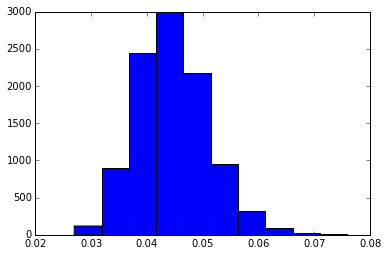

In [7]:
print final_values.mean()/final_values.std() # measured value Signal/Noise
print 0.5*n_root/sqrt(n_root*0.28**2) # expected value Signal/Noise
a = hist(final_values)